In [76]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [56]:
df.shape

(100000, 9)

In [57]:
feature_names = df.columns
print(feature_names)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [58]:
# جدا کردن ویژگی‌ها (features) و تارگت (target)
X = df.drop('diabetes', axis=1)  # ویژگی‌ها
y = df['diabetes']  # تارگت


In [66]:
# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نمایش تعداد نمونه‌ها در هر مجموعه
print(f'Training samples: {len(X_train)}')
print(f'Test samples: {len(X_test)}')
print ("Shape of Train Data:", X_train.shape)
print ("Shape of Test Data:", X_test.shape)

Training samples: 80000
Test samples: 20000
Shape of Train Data: (80000, 8)
Shape of Test Data: (20000, 8)


In [67]:
# ایجاد و آموزش مدل KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
# پیش‌بینی بر روی مجموعه‌ی آزمون
y_pred = knn.predict(X_test)

In [69]:
# محاسبه و نمایش دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9607


In [70]:
# نمایش گزارش طبقه‌بندی
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.90      0.61      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [60]:
y_train.shape

(80000,)

In [61]:
# بررسی مقادیر منحصر به فرد در ستون 'diabetes'
unique_values = df['diabetes'].unique()
print(f'Unique values in diabetes column: {unique_values}')


Unique values in diabetes column: [0 1]


In [74]:
knn.score(X_train, y_train)

0.9694

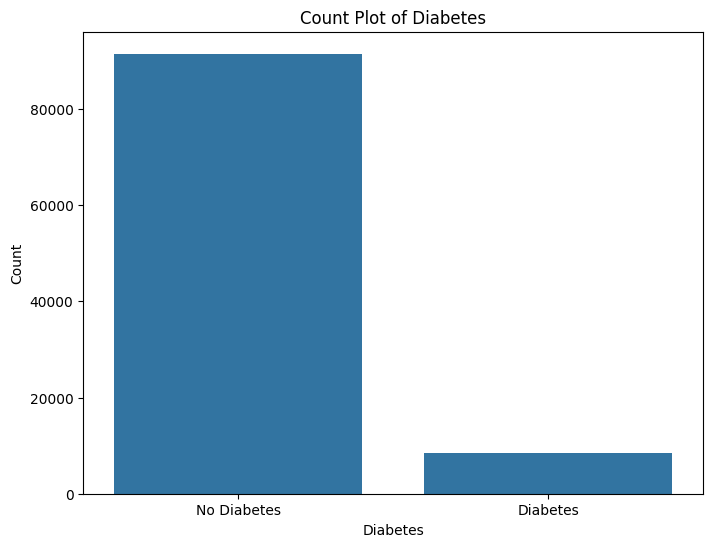

In [73]:
# رسم نمودار شمارش برای ستون 'diabetes'
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Count Plot of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # برچسب‌های محور X برای فهم بهتر
plt.show()


<Axes: >

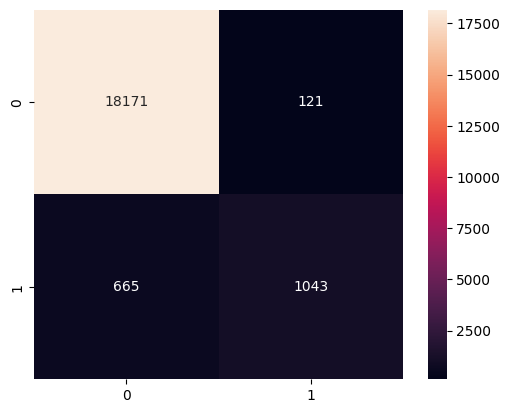

In [78]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d')

In [79]:
error_rate = []
# Might take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

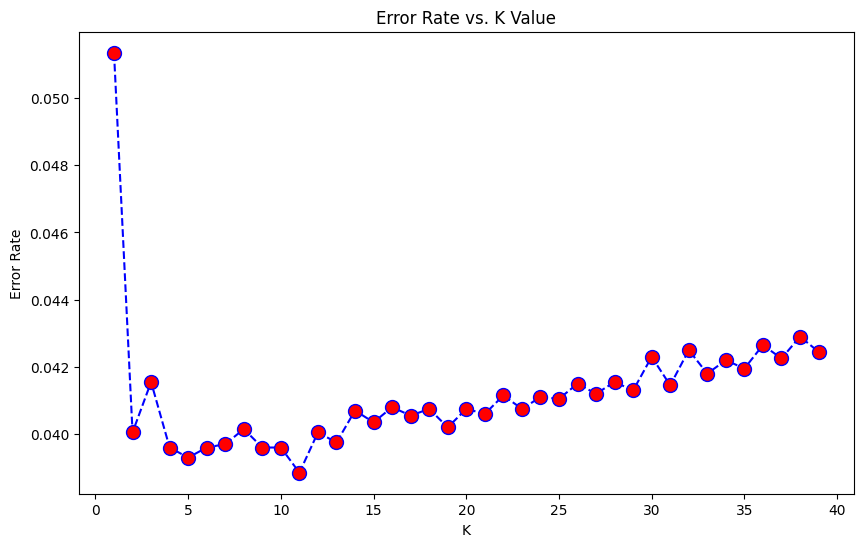

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [81]:
knn = KNeighborsClassifier(n_neighbors=11)

In [82]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [83]:
y_pred = knn.predict(X_test)

In [84]:
knn.score(X_train, y_train)

0.964625